In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
#plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/CodingTest/accident_stat.xlsx')
df

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,12767,445,5999,6664,458
1,차대사람,차도통행중,차도통행중,3628,146,1438,2007,183
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1973,33,563,1330,121
3,차대사람,보도통행중,보도통행중,2226,21,745,1455,131
4,차대사람,기타,기타,14675,333,4887,9139,1062
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162
8,차대차,추돌,추돌,32717,379,7564,47111,2748
9,차대차,기타,기타,44222,248,9990,49616,3839


1. 사고유형대분류가 "차대차"인 사고유형별 사망비율을 막대 그래프로 시각화하시오. 단, 사망비율은 사망자수/사고건수로 계산하며, matplotlib에서 폰트는 아래의 코드를 사용하여 맑은 고딕으로 설정합니다.
* plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
df['사망비율'] = df['사망자수']/df['사고건수']
df['사망비율'] = round(df['사망비율'],3)

a_df = df.loc[df['사고유형대분류'] == '차대차']

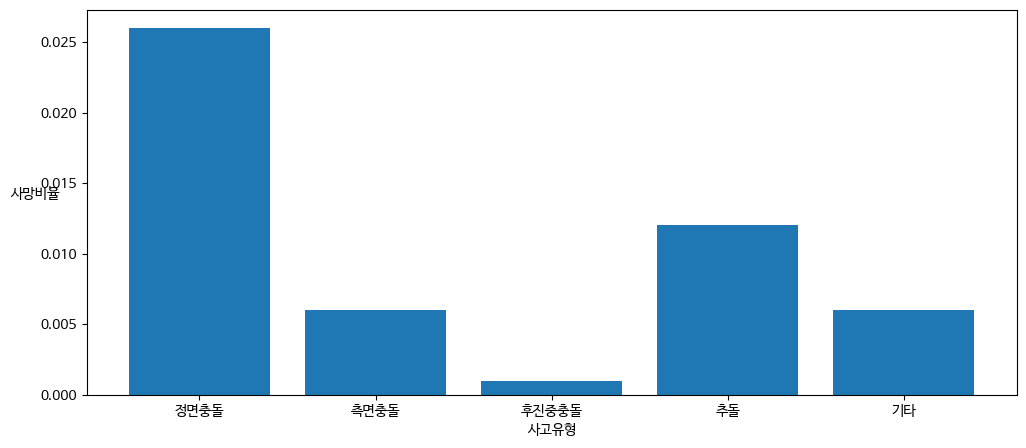

In [ ]:
plt.figure(figsize=(12,5))

plt.bar(range(len(a_df)), a_df['사망비율'])
plt.xticks(range(len(a_df)), a_df['사고유형'])

plt.xlabel('사고유형')
plt.ylabel('사망비율',rotation=0)
plt.show()

2. 사고유형대분류별로 사망자 수가 가장 많은 사고 유형을 출력하세요. 결과는 ['횡단중', '측면충돌', '공작물충돌']이어야 합니다.

In [ ]:
df.loc[df.groupby('사고유형대분류')['사망자수'].idxmax(),'사고유형'].tolist()

['횡단중', '측면충돌', '공작물충돌']

3. 사고유형별 중상비율을 계산하고, 중상비율이 50%를 넘는 데이터만 중상비율.csv로 저장합니다. 


In [ ]:
df['중상비율'] = df['중상자수']/df['사고건수']
df

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수,중상비율
0,차대사람,횡단중,횡단중,12767,445,5999,6664,458,0.469883
1,차대사람,차도통행중,차도통행중,3628,146,1438,2007,183,0.396362
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1973,33,563,1330,121,0.285352
3,차대사람,보도통행중,보도통행중,2226,21,745,1455,131,0.334681
4,차대사람,기타,기타,14675,333,4887,9139,1062,0.333015
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588,0.448429
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781,0.247688
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162,0.086511
8,차대차,추돌,추돌,32717,379,7564,47111,2748,0.231195
9,차대차,기타,기타,44222,248,9990,49616,3839,0.225906


In [ ]:
df.loc[df['중상비율']>0.5].to_csv('중상비율.csv', index=False)

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수,사망비율,중상비율
11,차량단독,전복,전복,165,36,87,81,27,0.218,0.527273
14,차량단독,도로이탈,도로이탈 추락,385,73,199,179,44,0.190,0.516883
